### Analyzing the Stroop Effect
(1) What is the independent variable? What is the dependent variable?

**Answer:**

+  Independent variable : the type of words (in this particular case: incongruent words and congruent words)
+  Dependent variable   : time (duration)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Answer:**

+ Since we compare the means of the same group with each other on different aspects (reading incongruent words vs. reading congruent words), we will use a dependent, paired sample T-test for the mean. We will choose the alpha level 0.5.

+  **Null hypothesis**: there is not any statistical difference between the average time it takes to correctly read the congruent words and the average time it takes to correctly read the incongruent words.
+  **Alternative hypothesis**: The average time it takes to correctly read the incongruent words is statistically different from the average time it takes to correctly read the congruent words.

(or)

+  **H<sub>o</sub>** : t<sub>i</sub> = t<sub>c</sub> 
+  **H<sub>a</sub>** : t<sub>i</sub> != t<sub>c</sub>

**Explanation**

  +  **t<sub>i</sub>**: the averagetime it takes to correctly read the incongruent words <br>
  +  **t<sub>c</sub>**: the average time it takes to correctly read the congruent words

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [12]:
# Import the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
test = pd.read_csv('stroopdata.csv')

In [13]:
# Check the first few observations
test.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [15]:
# Examine the dataset. Everything looks good; there are a total of 24 observations and there are no missing values.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [16]:
# Perform the analysis here. We will use method .describe() to get the discriptive statistics for the dataset.
test.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**Answer**:

+ (Measures of Centrality: Mean and Median) 
    + The average time it takes (mean) to read the congruent words is 14.05 seconds while the average time it takes to read the incongruent words is 22.02 seconds. 
    + 50% of the observations take less than 14.36 seconds to read the congruent words and less than 21.02 seconds to read the incongruent words. (Median)
+ (Measure of Variability: Standard Deviation)
    + The standard deviation for the time it takes to read the congruent words is 3.56 seconds while the standard deviation for the time it takes to read the incongruent words is 4.80 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [17]:
# Check the dataset again
test.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


We will plot three plots: a histogram, an area plot, and a side-by-side box plot

First, we will plot three histograms. One will show the distribution of the entire dataset; the other two will show the distributions of the time to read "Congruent words"  and the time to read "Incongruent words". In order to plot the first histogram, we will melt our two categories to convert our wide format dataframe to a long format.

In [18]:
# Make a new dataframe (test_long) and examine the first few rows.
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.melt.html
test_long = pd.melt(frame = test, value_vars = ['Incongruent', 'Congruent'], 
                    var_name = "word_type", value_name = "duration")

test_long.head()

,word_type,duration
0,Incongruent,19.278
1,Incongruent,18.741
2,Incongruent,21.214
3,Incongruent,15.687
4,Incongruent,22.803


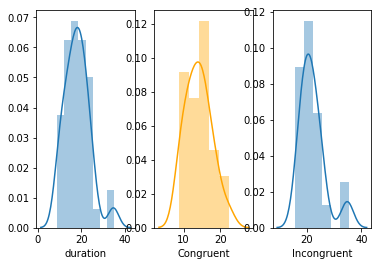

In [19]:
# Plot the three aforementioned histograms on the same plot.
# https://seaborn.pydata.org/generated/seaborn.distplot.html
fig, axes = plt.subplots(nrows = 1, ncols = 3)

sns.distplot(test_long['duration'], ax = axes[0])

sns.distplot(test['Congruent'], ax = axes[1], color = 'Orange')

sns.distplot(test['Incongruent'], ax = axes[2])

We can see that all three histograms exhibit an approximately normal distribution. The time it takes to read congruent words falls mostly between 9 and 21 seconds while for reading incongruent words, it falls mostly between 17 and 28 seconds. 

Secondly, we will plot an unstacked area plot.

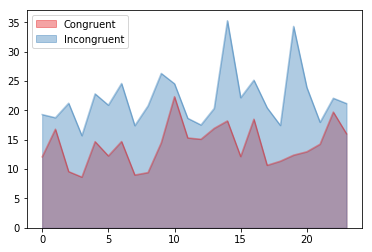

In [20]:
# https://python-graph-gallery.com/254-pandas-stacked-area-chart/
# https://seaborn.pydata.org/tutorial/color_palettes.html (for choosing color palettes)
test.plot.area(stacked = False, color = sns.color_palette("Set1"), alpha = 0.4)

We can see that the time it takes to read incongruent words is higher for all observations based on the unstacked area plot. 

Next we will plot a side by side box plot. In order to do so, we will utilize the long format data frame we created earlier.

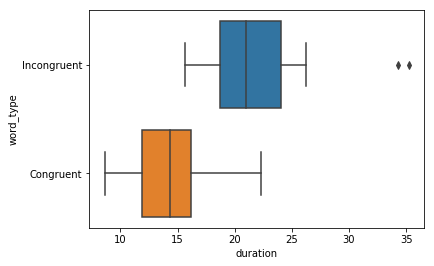

In [21]:
# Plot the side-by-side boxplot
sns.boxplot(x = "duration", y = "word_type", data = test_long)

+ **Incongruent words**
    + 50% of the observations take anywhere between 18 to 23 seconds to finish reading.
    + There are two outliers. Two people that take 33 - 35 seconds to finish reading.
    + The minimum time is a little over 15 seconds while the maximum time (not taking into account the outliers) is roughly 27 seconds.
    + Median: roughly 21 seconds. 

+ **Congruent words**
    + 50% of the observations take anywhere between 12-17 seconds to finish reading.
    + There are no outliers. 
    + The minimum time it takes is roughly 8 seconds; the maximum time is about 22-23 seconds.
    + Median: about 14 seconds.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

(https://pythonfordatascience.org/paired-samples-t-test-python/) <br>
(https://stattrek.com/estimation/mean-difference-pairs.aspx)
+ First, we will perform an assumption check.
    + (1) The data set results from a simple random sample of observations. (Checked). 
    + (2) Measurements of two paired variables are included. (Checked).
    + (3) Normality: the dataset is normally distributed, as discussed above. (Checked).

In [22]:
# Perform the statistical test here
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html

from scipy.stats import ttest_rel as t_paired

t,p = t_paired(test['Incongruent'], test['Congruent'])

t,p

(8.020706944109957, 4.103000585711178e-08)

**Conclusion**
+ T-Statistic: 8.02
+ p-value: 0.0000000410 is much smaller than our cutoff value 0.05. We reject the null hypothesis with our confidence level being 95%. We can conclude that we are 95% confident there is a statisticallly significant difference between the average time it takes to finish reading the congruent words and the average time it take to finish reading the incongruent words. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**
+ This result is probably due to the brain having to work harder to recognize the incongruent words. Acccording to [this explanation](https://imotions.com/blog/the-stroop-effect/), our brain has no problem reading and comprehending words but there is definitely an increase in cognitive effort and load if our brain has to work harded to resolved the incongruity of the incongruent words. 
+ A similar task could be to say one thing and to do something else. For example, we can have a group of participants perform two different sets of tasks: the first set of task would be to say and do the same thing (i.e. "Stand up!") and the second set of tasks would be to say one thing and do something else (i.e. say "Stand up!" but the participant has to sit down). We record the time it takes for each set of tasks. My hypothesis is there is a statistically significant difference between the average time it takes to perform two tasks.

**References**

+ https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.melt.html
+ https://seaborn.pydata.org/generated/seaborn.distplot.html
+ https://python-graph-gallery.com/254-pandas-stacked-area-chart/
+ https://seaborn.pydata.org/tutorial/color_palettes.html 
+ https://pythonfordatascience.org/paired-samples-t-test-python/
+ https://stattrek.com/estimation/mean-difference-pairs.aspx
+ https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html